<a href="https://colab.research.google.com/github/JSJeong-me/Irostyle_consortium/blob/main/Python-Algorithms/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 쾨니히스베르크의 다리 문제는 프로이센의 쾨니히스베르크(지금의 러시아 칼리닌그라드)에 있는 7개의 다리에 관련된 문제이다. 쾨니히스베르크에는 프레겔 강이 흐르고 있고, 이 강에는 두 개의 큰 섬이 있다. 그리고 이 섬들과 도시의 나머지 부분을 연결하는 7개의 다리가 있다. 이때 7개의 다리들을 한 번만 건너면서 처음 시작한 위치로 돌아오는 길이 있는가 하는 것이 문제이다. 1735년에 레온하르트 오일러가 이것이 불가능하다는 것을 증명했다.

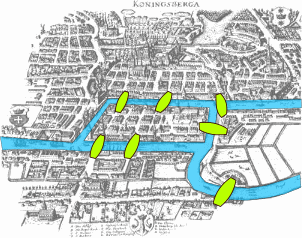

Adjacency Matrix
Adjacency matrix is a nxn matrix where n is the number of elements in a graph.

And the values represents the connection between the elements.

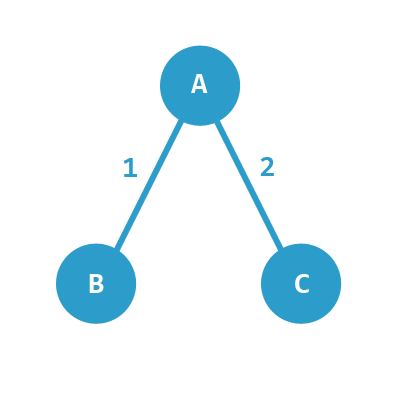

For a graph like this, with elements A, B and C, the connections are:

A & B are connected with weight 1.

A & C are connected with weight 2.

C & B is not connected.

희소행렬(Sparse matrix)의 경우 대부분의 값이 '0'이므로 이를 그대로 사용할 경우 메모리 낭비가 심하고 또 연산시간도 오래 걸리는 단점이 있습니다. 이런 단점을 피하기 위해 희소행렬을 다른 형태의 자료구조로 변환해서 저장하고 사용합니다. 



희소행렬을 저장하는 자료구조 4가지에는 



(a) Dictionary of keys(DOK): key (행번호, 열번호) 대 value (데이터) 매핑

(b) List of lists (LIL): 링크드 리스트 알고리즘을 이용한 저장 기법, 내용의 추가와 삭제가 용이하지만 CSR 대비 메모리 낭비가 큼

(c) Coordinate list (COO): (행, 열, 값) 튜플 목록 저장

(d) Compressed sparse row (CSR): 가로의 순서대로 재정렬하는 방법으로 행에 관여하여 정리 압축


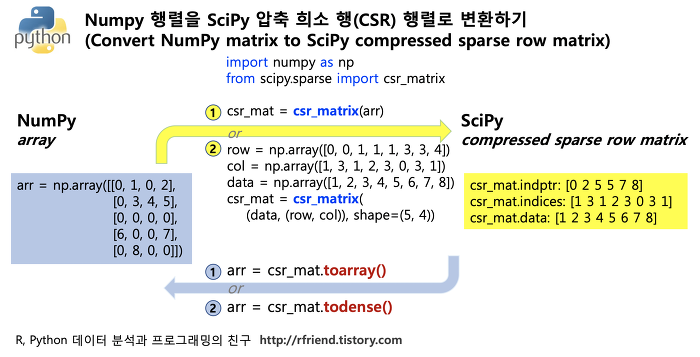

위에서 만든 'csr_mat' 이름의 5x4 sparse matrix (CSR format) 에서 특성값(attributes)으로서   - (a) csr_mat.indptr : 행렬의 '0'이 아닌 원소의 행의 시작 위치  - (b) csr_mat.indices : 행렬의 '0'이 아닌 원소의 열의 위치  - (c) csr_mat.data : 행렬의 '0'이 아닌 원소 값
출처: https://rfriend.tistory.com/551 [R, Python 분석과 프로그래밍의 친구 (by R Friend):티스토리]

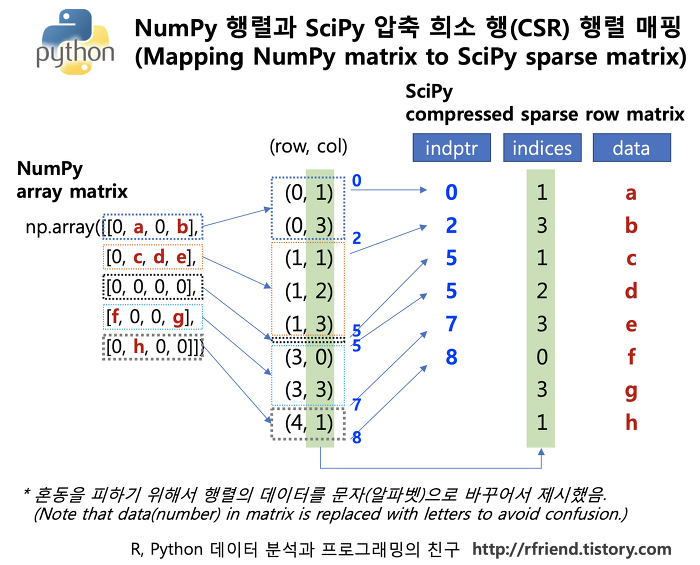

In [ ]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

In [ ]:

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

In [ ]:
arr

In [ ]:
newarr = csr_matrix(arr)

In [ ]:
newarr.indptr

In [ ]:
newarr.indices

In [ ]:
newarr.data

In [ ]:
print(connected_components(newarr))

In [ ]:
org_arr = csr_matrix.toarray(newarr)

In [ ]:
org_arr

Depth-first search

Definition
Depth-first search is an algorithm for traversing or searching tree or graph data structures [2]. Before explaining the DFS algorithm, let’s introduce the graph data structure. A graph G is a pair (V, E), where V is a finite set and E is a set of binary relations on V.
❖ V is called the vertex set and its elements are vertices.
❖ E is called the edge set and its elements are called edges. An edge is represented by a pair of vertices.

The diagram is a schematic representation of the graph with vertices 
V={1, 2, 3, 4, 5, 6}, 
E={{1, 2},{1, 5},{2, 3},{2, 5},{3, 4},{4, 5},{4, 6}}


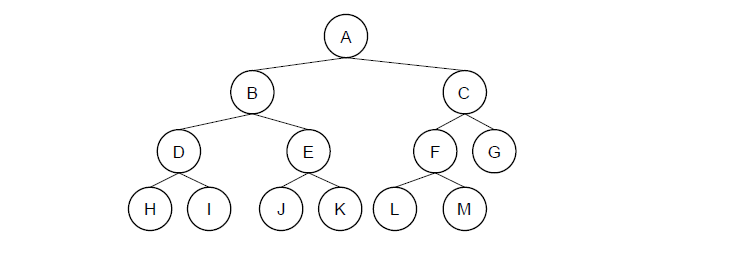

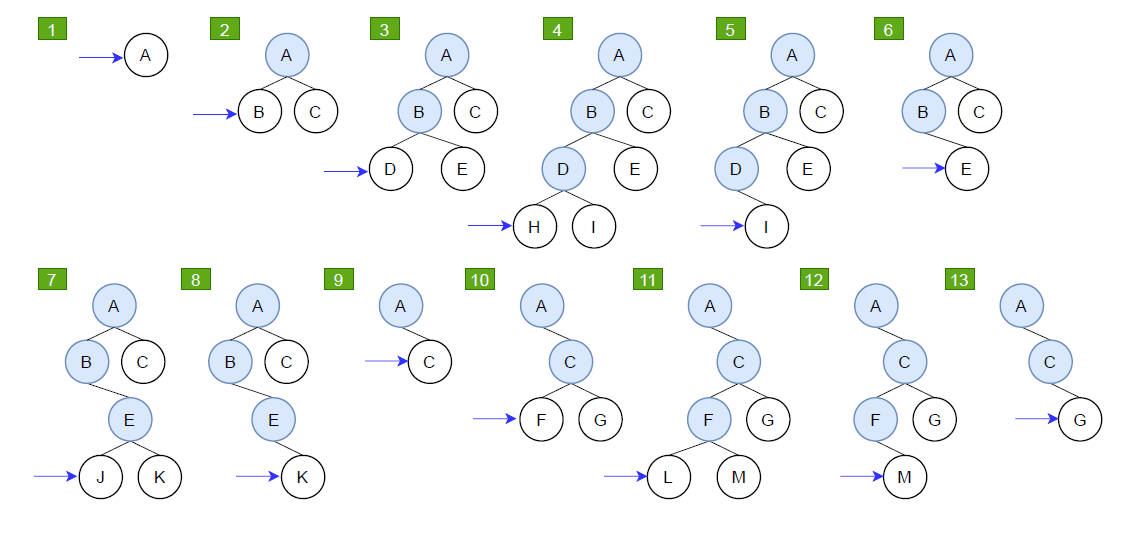

In [ ]:
from collections import defaultdict

In [ ]:
# Generate adjacency list for undirected graph
def generateAdjacencyLst(edges):
    adjacencyList = defaultdict(list)
    for u, v in edges:
        adjacencyList[u].append(v)
        adjacencyList[v].append(u)
    return adjacencyList

In [ ]:

edges = [['A', 'B'], ['A', 'C'], ['B', 'D'], ['B', 'E'], ['C', 'F'], ['C', 'G'], ['D', 'H'], ['D', 'I'], ['E', 'J'], ['E', 'K'], ['F', 'L'], ['F', 'M']]
adjacencyList = generateAdjacencyLst(edges)
print(adjacencyList)

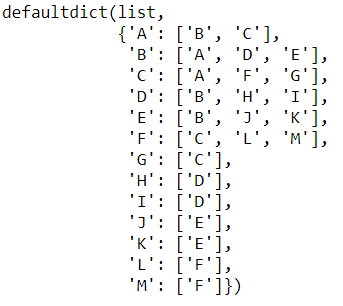

Breadth First Search In Python
Breadth First Search (or BFS for short) is a graph traversal algorithm. In BFS, we visit all of the neighboring nodes at the present depth prior to moving on to the nodes at the next depth.

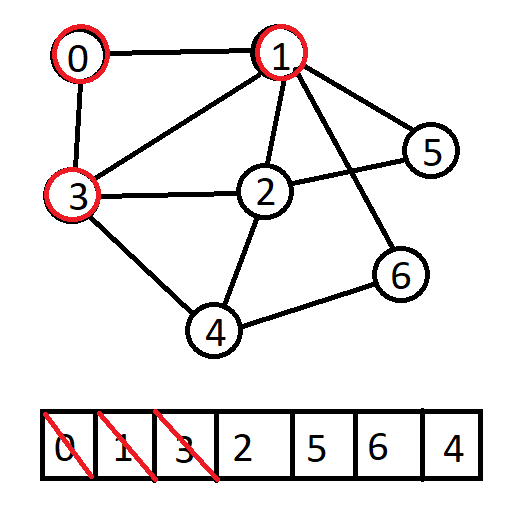

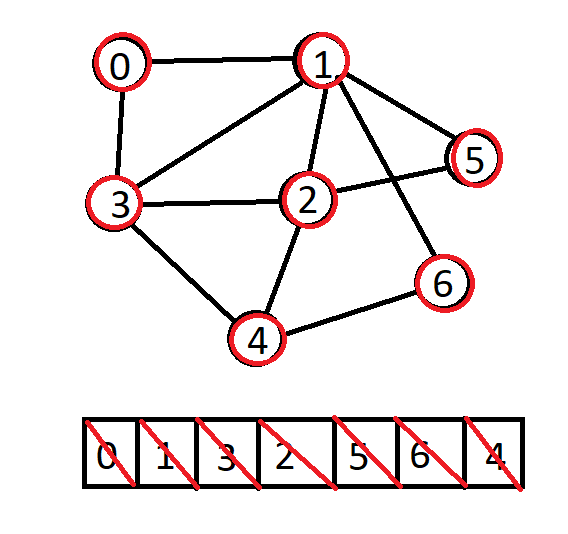

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

We randomly generate a graph with 7 nodes where the probability that we create an edge connecting two nodes is 40%.

In [ ]:
G = nx.random_graphs.fast_gnp_random_graph(7, 0.4)

In [ ]:
G.number_of_edges()

In [ ]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, alpha=0.5)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
draw_graph(G)

We can list the nodes and edges in the graph as follows.

In [ ]:
G.nodes

In [ ]:
G.edges

Next, we implement the Breadth First Search algorithm. In order to determine the nodes that are adjacent to the current node, we find all the tuples containing the current node, and add the other node.

In [ ]:
def bfs(graph, starting_node):
    visited = []
    queue = [starting_node]
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)            
            for edge in graph.edges:
                if edge[0] == node:
                    queue.append(edge[1])
                elif edge[1] == node:
                    queue.append(edge[0])
    return visited

We call the function using the graph we just created and node 1 as the starting node.
---



In [ ]:
bfs(G, 1)

Shortest Path
Let’s see how we can use the Breadth First Search algorithm to determine the shortest path between two nodes.

In [ ]:
def find_shortest_path(graph, starting_node, goal):
    visited = []
    queue = [[starting_node]]
    
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node not in visited:
            neighbours = []
            for edge in graph.edges:
                if edge[0] == node:
                    neighbours.append(edge[1])
                elif edge[1] == node:
                    neighbours.append(edge[0])
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                queue.append(new_path)
                
                if neighbour == goal:
                    return new_path
            
            visited.append(node)
            
    return []

We find the shortest path from node 1 to node 3.

In [ ]:
find_shortest_path(G, 2, 6)

As we can see, the algorithm correctly determined the shortest path between the nodes.